# Compare model polysome counts to experimental data 

The model produces an exact account of polysomes on the mRNA. We can use this to compare it to ribosomal profiling data - which give very similar results - to validate our output. Here we look at the run-off simulation after the experiment performed by Presnyak 2015. For this experiment we let the cell go to a steady state before and we use this state to compare it with experimental data.

In [14]:
from translation.analyze import *
import cPickle as pkl
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

In [15]:
%matplotlib inline

Load the steady state and the run-off state after glucose starvation.

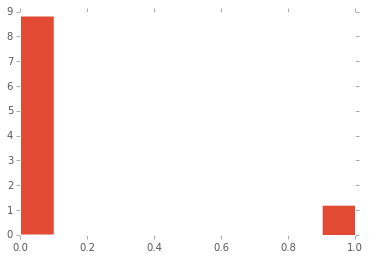

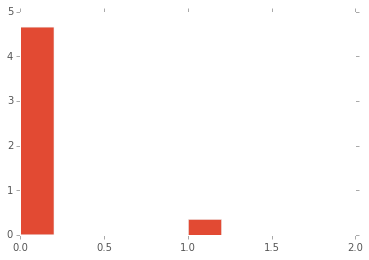

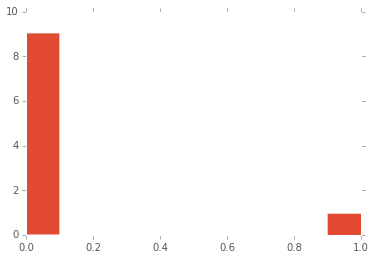

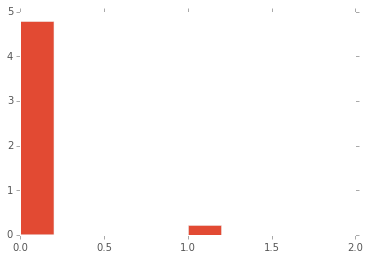

In [3]:
steady = pkl.load(open("../results/steady_state_20150701_2026_0089s.p", "rb"))
plot_polysome_histograms(steady, subset=("YJL124C","YHL015W"))
run_off = pkl.load(open("../results/glucose_starvation_after_steady_20150701_2027_0009s.p", "rb"))
plot_polysome_histograms(run_off, subset=("YJL124C","YHL015W"))
plt.show()

In [4]:
steady_ribos = get_polysome_histogram(steady)
ribos = [sum(steady_ribos[x]) for x in steady_ribos]
max_ribos = [max(steady_ribos[x]) for x in steady_ribos]
mrna_count = [len(steady_ribos[x]) for x in steady_ribos]

To get an overview we calculate some aggregates of the whole data-set.

In [10]:
results = pd.DataFrame(np.array([ribos, 
                       mrna_count, 
                       max_ribos]).T,
             index = steady_ribos.keys(),
            columns = ["ribosome_count",
                      "mrna_count",
                      "max_ribos"])
transcripts = steady["transcriptome"]
seq_length = {}
for mrna in transcripts:
    if mrna.geneID in seq_length:
        pass
    else:
        seq_length[mrna.geneID] = len(mrna.sequence)
mrna_length = pd.DataFrame(seq_length, columns=seq_length.keys(), index=["mrna_length"]).T

This tells us the steady state distribution of polysomes:

(array([  4.20126000e+05,   1.29208000e+05,   2.12390000e+04,
          2.14500000e+03,   1.65000000e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 5 Patch objects>)

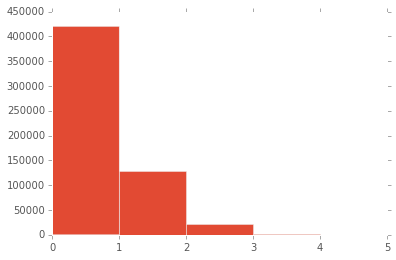

In [11]:
import itertools
ribos_per_mrna = list(itertools.chain.from_iterable(steady_ribos.values()))
plt.hist(ribos_per_mrna, bins=5)

It is clear that we see very few true polysomes and many empty mRNAs. This is surprising to me. Can this be seen in experiments as well?

In [12]:
results = results.join(mrna_length)

In [113]:
results

,ribosome_count,mrna_count,max_ribos,mrna_length
YBR177C,44,65,3,1356
YIL140W,37,68,3,2472
YLR268W,15,73,2,645
YIR004W,41,63,3,1299
YAL008W,14,83,1,597
YOR043W,61,82,4,1461
YJL122W,20,141,3,528
YCR093W,83,130,2,6327
YLR244C,134,221,4,1164
YPL144W,9,34,2,447


# Analyze simulation results

We have some clear correllation in our data, but nothing surprising.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f93324a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f77734510>]], dtype=object)

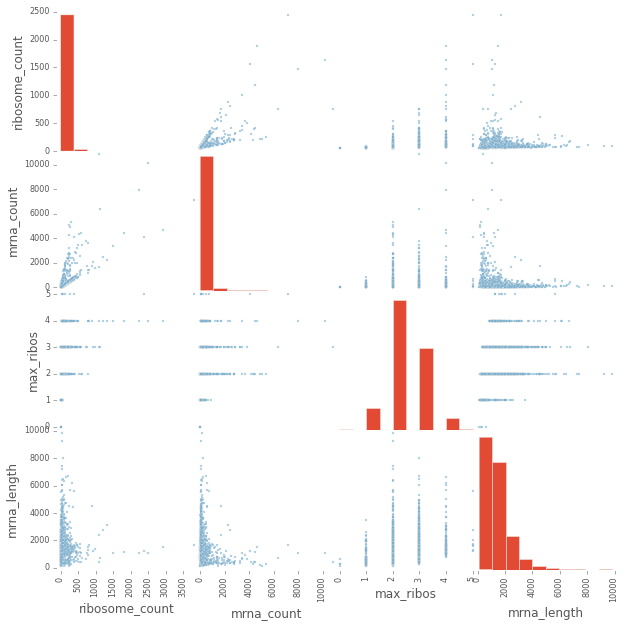

In [13]:
pd.scatter_matrix(results, figsize=(10,10))

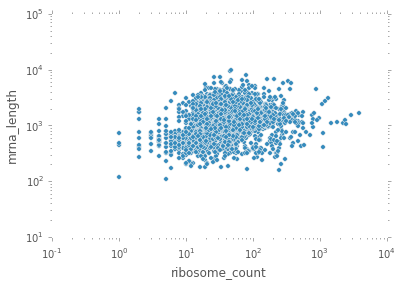

In [16]:
results[results.ribosome_count > 0].plot("ribosome_count", "mrna_length", kind="scatter", loglog=True)

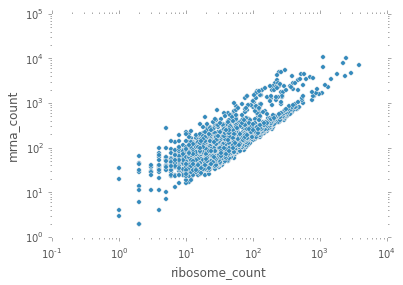

In [17]:
results[results.ribosome_count > 0].plot("ribosome_count", "mrna_count", kind="scatter", loglog=True)

## Experimental Data

Data from Ingolia 2009 was not easily accessible, so I used ribo profiling data from Pop 2014 ([GSEGSE63789](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1557447))

In [84]:
ribo_profiling = pd.read_csv("../data/GSE63789_counts_wt.txt", sep="\t")

In [85]:
ribo_profiling.head()

,#Name,Length,Sum-mRNA,Sum-FP,FP
0,YAL001C,1161,17547,1227,1 10 1 1 5 5 0 2 0 0 0 0 2 0 0 0 1 3 3 0 0 0 0...
1,YAL002W,1275,10012,497,0 9 1 0 2 0 0 0 0 0 0 0 0 1 0 3 0 0 0 1 0 0 1 ...
2,YAL003W,207,331142,119930,21 3159 146 29 58 332 44 268 98 92 52 30 175 7...
3,YAL007C,216,33005,4104,2 92 39 3 11 6 2 0 3 5 8 0 0 7 8 23 10 23 4 28...
4,YAL008W,199,6247,1218,0 19 1 0 0 0 6 0 8 22 5 17 2 8 8 0 14 8 7 9 21...


The table is a preprocessed outcome of the experiments and holds all the information we need:
    - #Name: gene name
    - Length: seq length
    - Sum-mRNA: total measured mRNA amounts
    - Sum-FP: total measured foot prints
    - FP: foot prints per position (notation is unclear)

In [86]:
ratio_mean = np.mean(ribo_profiling["Sum-FP"]/ribo_profiling["Sum-mRNA"])

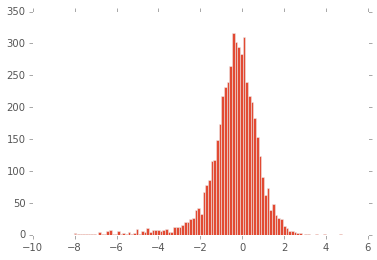

In [87]:
np.log2((ribo_profiling["Sum-FP"]/ribo_profiling["Sum-mRNA"])/ratio_mean).hist(bins=100)

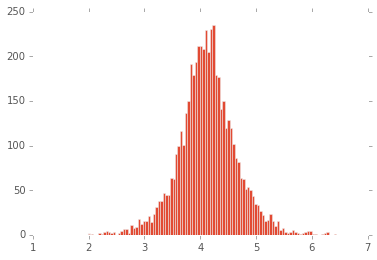

In [88]:
np.log10(ribo_profiling["Sum-mRNA"]).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f61696a10>]], dtype=object)

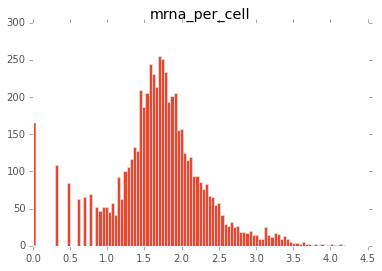

In [89]:
transcriptome = pd.DataFrame(pd.Series(pkl.load(open("../parameters/transcriptome.p", "rb"))))
transcriptome.columns = ["mrna_per_cell"]
np.log10(transcriptome[transcriptome > 0]).hist(bins = 100)

In [91]:
ribo_profiling.index = ribo_profiling["#Name"]
ribo_profiling = ribo_profiling.join(transcriptome)

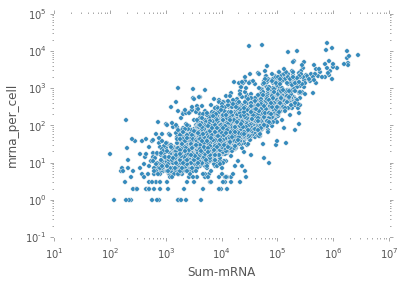

In [92]:
ribo_profiling[ribo_profiling.mrna_per_cell > 0].plot("Sum-mRNA","mrna_per_cell", kind="scatter", loglog=True)

In [42]:
ribo_profiling = ribo_profiling.join(transcriptome)

In [107]:
ribo_profiling["per_cell"] = (ribo_profiling["Sum-FP"]/ribo_profiling["Sum-mRNA"])*ribo_profiling.mrna_per_cell

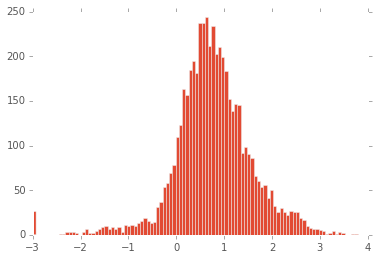

In [101]:
np.log10(ribos_per_gene+0.001).hist(bins=100)

In [108]:
compare = results.join(ribo_profiling)

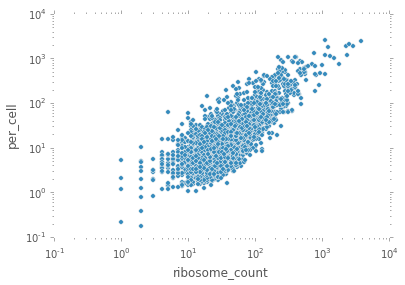

In [114]:
compare[compare.ribosome_count > 0].plot("ribosome_count","per_cell", kind="scatter", loglog=True)